In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import warnings
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Set plot style
plt.style.use('fivethirtyeight')
sns.set_palette('colorblind')

In [3]:
# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

In [4]:
# Add parent directory to path to import modules
sys.path.append('..')


In [6]:
# Import data ingestion and preprocessing modules
from src.data.data_ingestion import DataIngestion
from src.data.data_preprocessing import DataPreprocessing

In [7]:
# Initialize data ingestion and preprocessing
data_ingestion = DataIngestion(data_dir='../data')
data_preprocessing = DataPreprocessing(data_ingestion)

2025-05-04 15:15:22,900 - src.data.data_ingestion - INFO - Data directories initialized: ..\data
2025-05-04 15:15:22,901 - src.data.data_preprocessing - INFO - DataPreprocessing initialized


In [8]:
# Load raw data
portfolio_raw = data_ingestion.load_portfolio()
prices_raw = data_ingestion.load_portfolio_prices()

2025-05-04 15:15:27,347 - src.data.data_ingestion - INFO - Loading portfolio data from ..\data\raw\Portfolio.csv
2025-05-04 15:15:27,351 - src.data.data_ingestion - INFO - Portfolio data loaded successfully with shape (27, 5)
2025-05-04 15:15:27,353 - src.data.data_ingestion - INFO - Loading portfolio price data from ..\data\raw\Portfolio_prices.csv
2025-05-04 15:15:27,406 - src.data.data_ingestion - INFO - Portfolio price data loaded successfully with shape (35397, 9)


In [9]:
# Run preprocessing pipeline
portfolio_df, prices_df, sector_df, macro_df = data_preprocessing.run_preprocessing_pipeline()


2025-05-04 15:15:34,524 - src.data.data_preprocessing - INFO - Running preprocessing pipeline
2025-05-04 15:15:34,525 - src.data.data_preprocessing - INFO - Processing portfolio data
2025-05-04 15:15:34,526 - src.data.data_ingestion - INFO - Loading portfolio data from ..\data\raw\Portfolio.csv
2025-05-04 15:15:34,530 - src.data.data_ingestion - INFO - Portfolio data loaded successfully with shape (27, 5)
2025-05-04 15:15:34,534 - src.data.data_preprocessing - WARNING - Portfolio weights do not sum to 1. Sum: 100.0
2025-05-04 15:15:34,535 - src.data.data_preprocessing - INFO - Normalized portfolio weights to sum to 1
2025-05-04 15:15:34,537 - src.data.data_preprocessing - INFO - Portfolio data processed successfully
2025-05-04 15:15:34,538 - src.data.data_ingestion - INFO - Saving processed data to ..\data\processed\portfolio_data.csv
2025-05-04 15:15:34,543 - src.data.data_ingestion - INFO - Data saved successfully to ..\data\processed\portfolio_data.csv
2025-05-04 15:15:34,545 - src.

In [10]:
# Display portfolio data summary
print("Portfolio Data Shape:", portfolio_df.shape)
portfolio_df.head()

Portfolio Data Shape: (27, 6)


,Ticker,Quantity,Sector,Close,Weight,Market_Value
0,AAPL,1,IT,218.2700,0.0346,218.2700
1,ADAP,1,Pharmaceuticals,0.2910,0.0000,0.2910
2,AGCO,1,Agriculture,93.0900,0.0148,93.0900
3,BA,2,Military Engineering,178.1100,0.0282,356.2200
4,BG,4,Agriculture,73.2500,0.0116,293.0000


In [11]:
# Check data types
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        27 non-null     object 
 1   Quantity      27 non-null     int32  
 2   Sector        27 non-null     object 
 3   Close         27 non-null     float64
 4   Weight        27 non-null     float64
 5   Market_Value  27 non-null     float64
dtypes: float64(3), int32(1), object(2)
memory usage: 1.3+ KB


In [12]:
# Summary statistics
portfolio_df.describe()

,Quantity,Close,Weight,Market_Value
count,27.0000,27.0000,27.0000,27.0000
mean,2.8148,233.5567,0.0370,605.6049
std,1.6879,216.9758,0.0344,600.9600
min,1.0000,0.2910,0.0000,0.2910
25%,1.0000,91.1450,0.0145,242.2200
50%,2.0000,173.3600,0.0275,335.7800
75%,5.0000,300.9750,0.0477,934.9200
max,5.0000,960.2900,0.1523,2198.5001


In [13]:
# Analyze sector weights
sector_weights = portfolio_df.groupby('Sector')['Weight'].sum().sort_values(ascending=False)


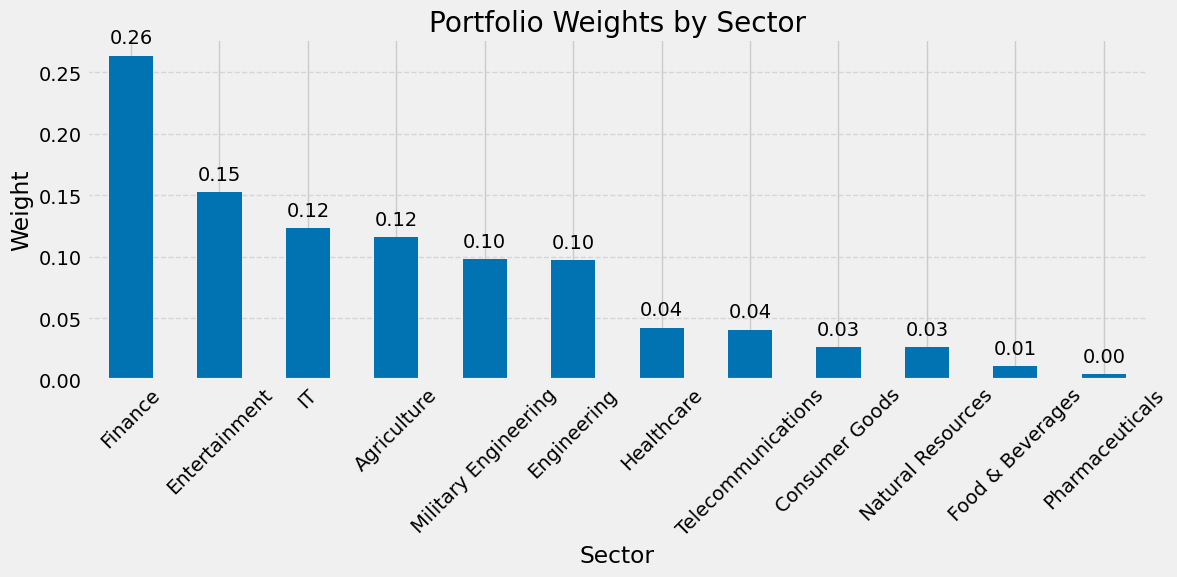

In [14]:
# Plot sector weights
plt.figure(figsize=(12, 6))
ax = sector_weights.plot(kind='bar')
plt.title('Portfolio Weights by Sector')
plt.xlabel('Sector')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(sector_weights):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

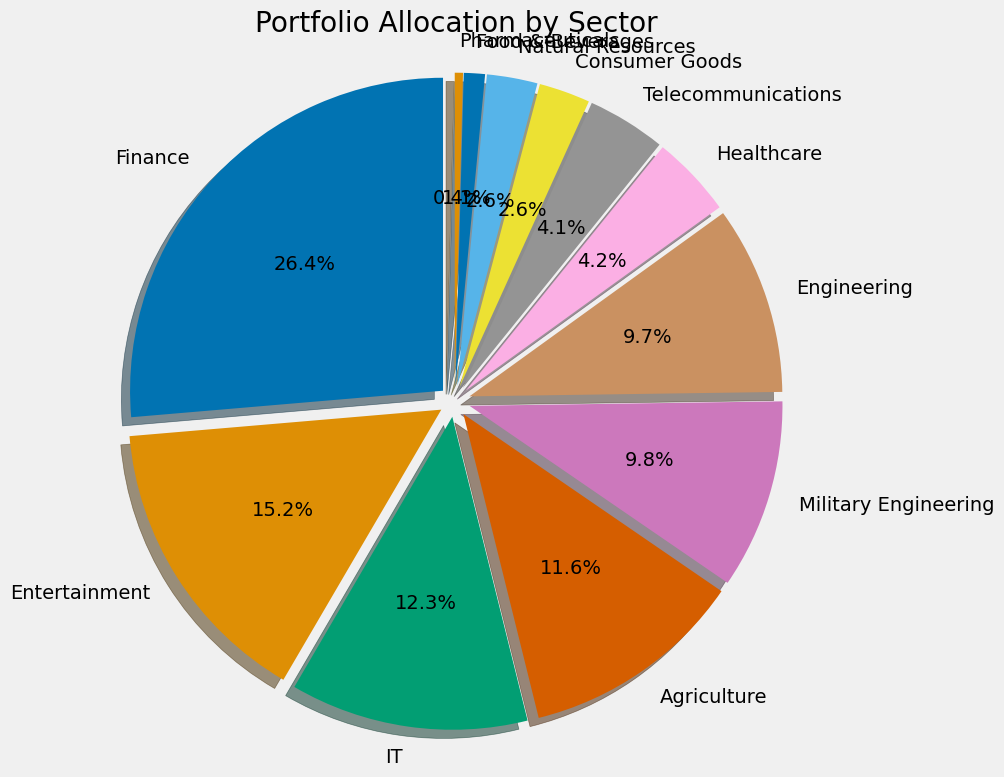

In [15]:
# Pie chart of sector weights
plt.figure(figsize=(10, 8))
plt.pie(sector_weights, labels=sector_weights.index, autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.05] * len(sector_weights))
plt.title('Portfolio Allocation by Sector')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

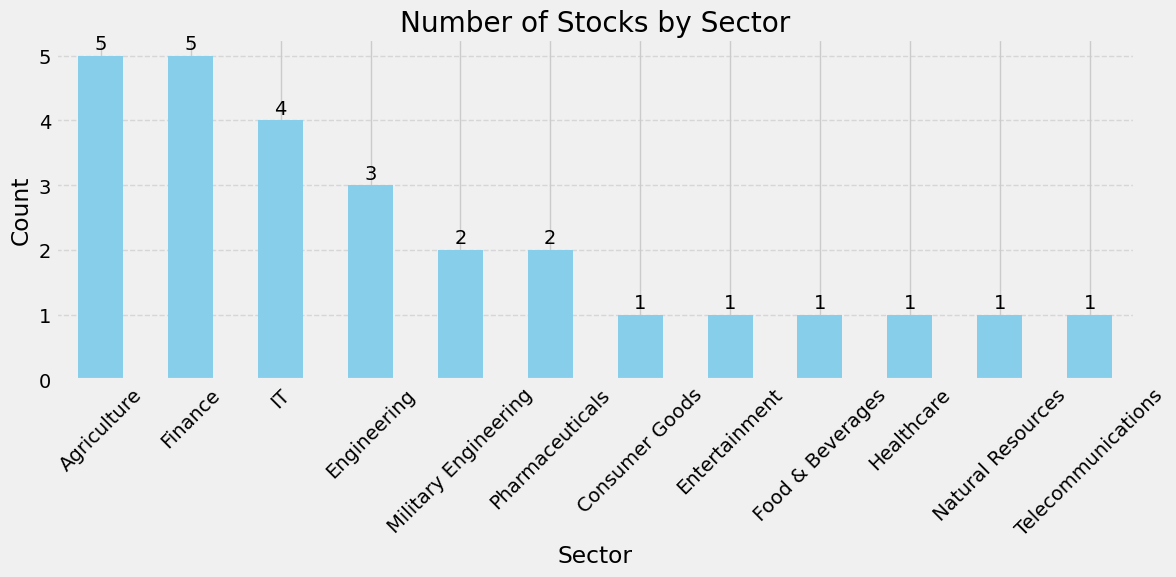

In [16]:
# Count number of stocks by sector
sector_counts = portfolio_df.groupby('Sector').size().sort_values(ascending=False)
# Plot number of stocks by sector
plt.figure(figsize=(12, 6))
ax = sector_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Stocks by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(sector_counts):
    ax.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()


## Price Data Exploration

In [17]:
print("Price Data Shape:", prices_df.shape)
prices_df.head()

Price Data Shape: (35397, 9)


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-03,JPM,137.5000,139.2300,137.0800,138.3400,119.8741,-0.0132,10386800
1,2020-01-03,KO,54.3200,54.9900,54.0900,54.6900,46.4947,-0.0055,11354500
2,2020-01-03,LMT,404.0200,417.1700,403.0000,413.7400,359.3123,0.0360,2990100
3,2020-01-03,MS,51.2200,51.4500,50.8300,51.2000,43.2731,-0.0161,6706000
4,2020-01-03,MSCI,262.2000,263.5800,259.2700,260.7500,248.0195,-0.0199,459700


In [18]:
# Check the date range
print(f"Date Range: {prices_df['Date'].min()} to {prices_df['Date'].max()}")
print(f"Number of unique dates: {prices_df['Date'].nunique()}")

Date Range: 2020-01-03 00:00:00 to 2025-03-21 00:00:00
Number of unique dates: 1311


In [19]:
# Check for missing dates
all_dates = pd.date_range(start=prices_df['Date'].min(), end=prices_df['Date'].max(), freq='B')
missing_dates = [date for date in all_dates if date not in prices_df['Date'].unique()]

print(f"Number of missing business days: {len(missing_dates)}")
if len(missing_dates) > 0:
    print("Sample of missing dates:")
    for date in missing_dates[:5]:
        print(date.strftime('%Y-%m-%d'))

Number of missing business days: 50
Sample of missing dates:
2020-01-20
2020-02-17
2020-04-10
2020-05-25
2020-07-03


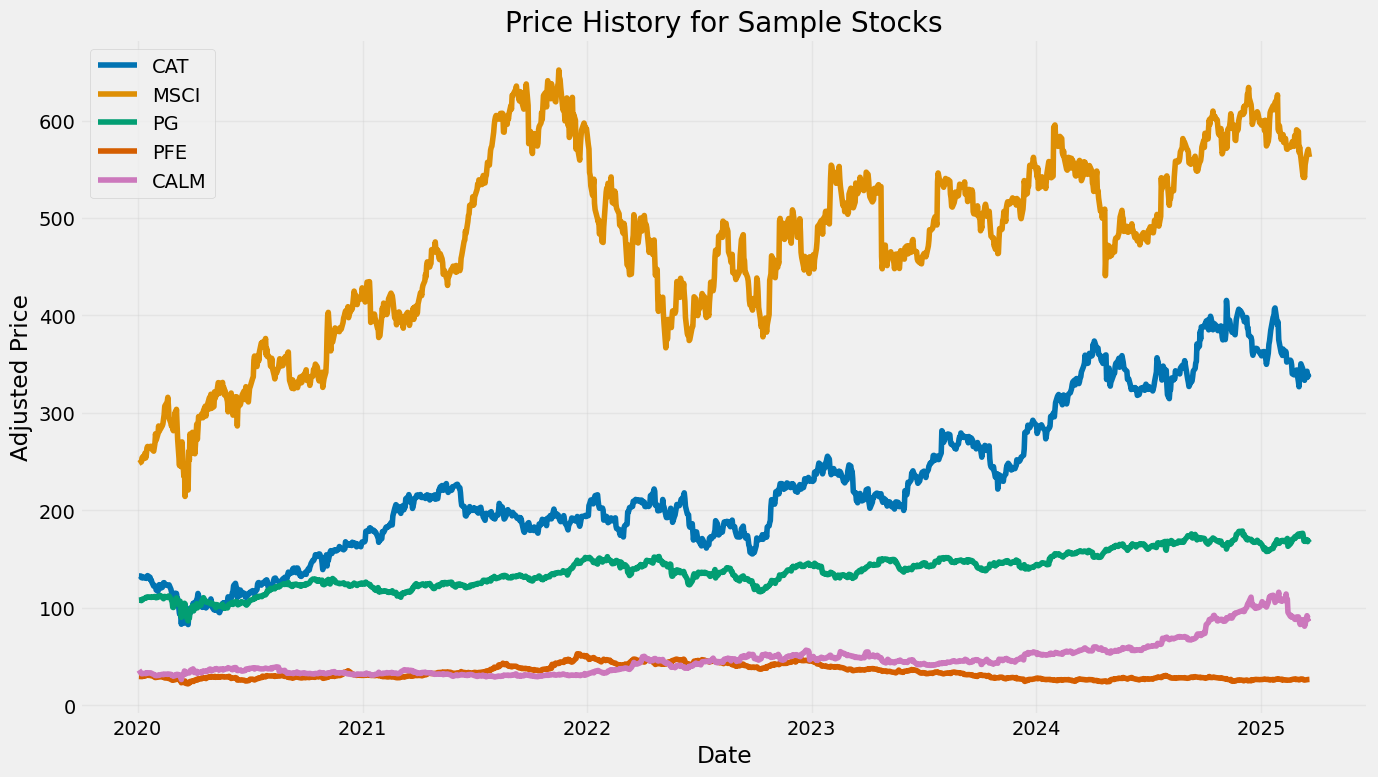

In [20]:
# Plot price history for a few sample stocks
sample_tickers = portfolio_df['Ticker'].sample(min(5, len(portfolio_df))).tolist()

plt.figure(figsize=(14, 8))
for ticker in sample_tickers:
    ticker_data = prices_df[prices_df['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Adjusted'], label=ticker)

plt.title('Price History for Sample Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Returns Analysis

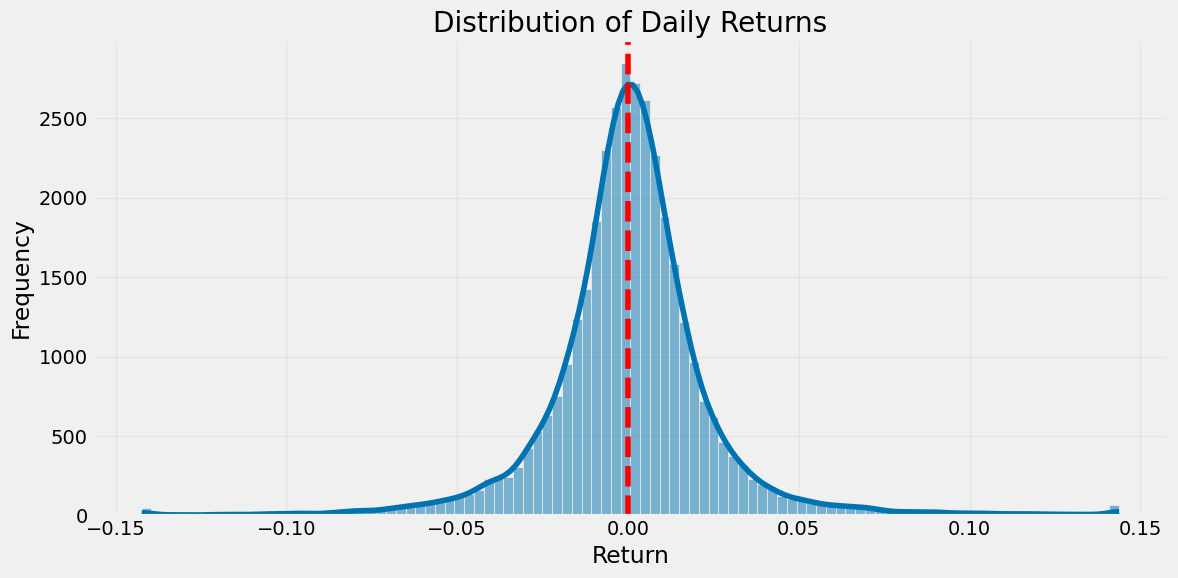

In [21]:
# Summary statistics for returns
prices_df['Returns'].describe()

# Plot returns distribution
plt.figure(figsize=(12, 6))
sns.histplot(prices_df['Returns'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [22]:
# Calculate mean returns and volatility by ticker
ticker_stats = prices_df.groupby('Ticker').agg({
    'Returns': ['mean', 'std', 'count']
}).reset_index()

In [23]:
ticker_stats.columns = ['Ticker', 'Mean_Return', 'Volatility', 'Data_Points']
ticker_stats['Annualized_Return'] = ticker_stats['Mean_Return'] * 252  # Assuming 252 trading days
ticker_stats['Annualized_Volatility'] = ticker_stats['Volatility'] * np.sqrt(252)
ticker_stats['Sharpe_Ratio'] = ticker_stats['Annualized_Return'] / ticker_stats['Annualized_Volatility']



In [24]:
# Merge with sector information
ticker_stats = pd.merge(ticker_stats, portfolio_df[['Ticker', 'Sector']], on='Ticker', how='left')


In [25]:
# Sort by Sharpe ratio
ticker_stats = ticker_stats.sort_values('Sharpe_Ratio', ascending=False)
ticker_stats.head(10)

,Ticker,Mean_Return,Volatility,Data_Points,Annualized_Return,Annualized_Volatility,Sharpe_Ratio,Sector
26,TMUS,0.0011,0.0173,1311,0.2688,0.2746,0.9791,Telecommunications
13,IBKR,0.0012,0.0220,1311,0.3130,0.3493,0.8961,Finance
21,NFLX,0.0014,0.0265,1311,0.3583,0.4214,0.8504,Entertainment
0,AAPL,0.0010,0.0199,1311,0.2612,0.3159,0.8268,IT
10,DE,0.0010,0.0208,1311,0.2567,0.3300,0.7780,Agriculture
20,MSFT,0.0009,0.0191,1311,0.2271,0.3028,0.7500,IT
6,CAT,0.0009,0.0204,1311,0.2285,0.3231,0.7070,Engineering
5,CALM,0.0009,0.0208,1311,0.2317,0.3306,0.7009,Agriculture
18,MS,0.0010,0.0217,1311,0.2404,0.3449,0.6971,Finance
25,SPY,0.0006,0.0131,1311,0.1429,0.2081,0.6868,Finance


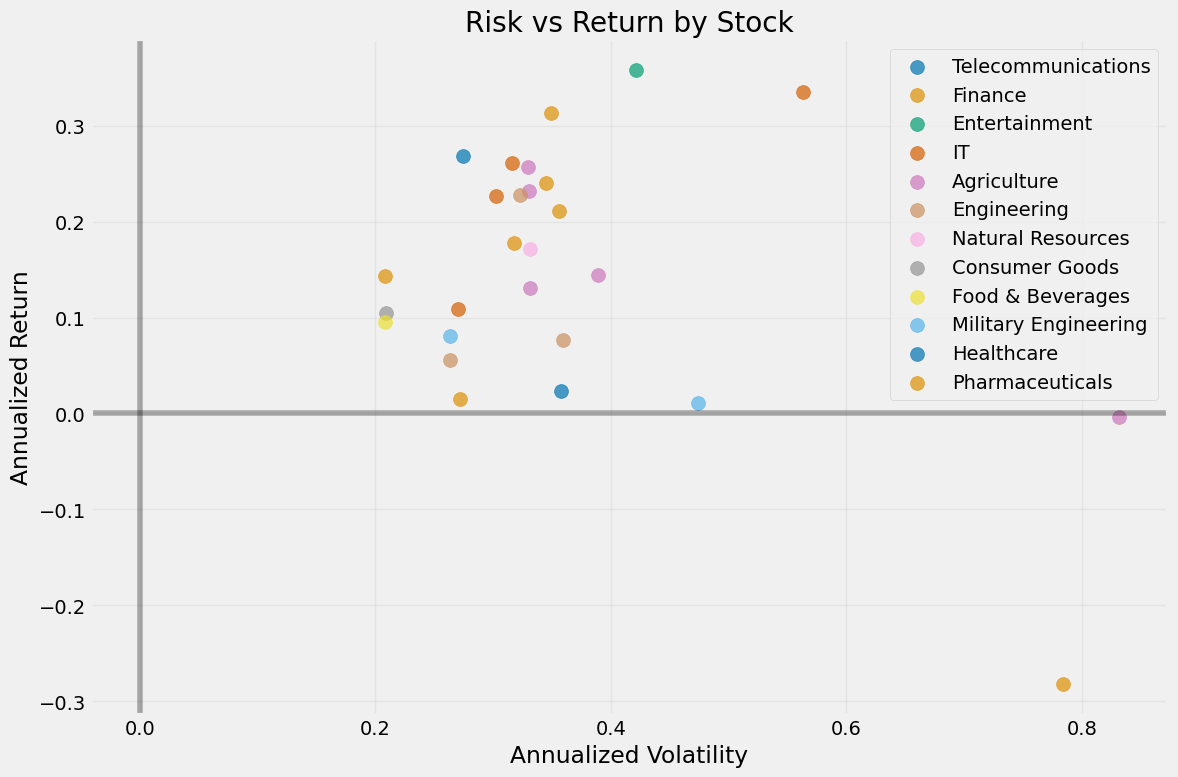

In [26]:
# Plot return vs volatility scatter
plt.figure(figsize=(12, 8))
for sector in ticker_stats['Sector'].unique():
    sector_data = ticker_stats[ticker_stats['Sector'] == sector]
    plt.scatter(sector_data['Annualized_Volatility'], 
                sector_data['Annualized_Return'], 
                label=sector, 
                alpha=0.7,
                s=100)

plt.title('Risk vs Return by Stock')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Sector Performance Analysis

In [27]:
print("Sector Data Shape:", sector_df.shape)
sector_df.head()

Sector Data Shape: (15732, 9)


,Date,Sector,Returns,Volume,Adjusted,Cumulative_Returns,Return_20d,Return_50d,Volatility_20d
0,2020-01-03,Agriculture,0.0005,2805900,63.6944,0.0005,NaN,NaN,NaN
12,2020-01-06,Agriculture,-0.0220,6735700,63.1484,-0.0214,NaN,NaN,NaN
24,2020-01-07,Agriculture,-0.0184,3847400,62.1771,-0.0395,NaN,NaN,NaN
36,2020-01-08,Agriculture,0.0136,4733300,62.5346,-0.0264,NaN,NaN,NaN
48,2020-01-09,Agriculture,0.0045,3463300,62.7946,-0.0220,NaN,NaN,NaN


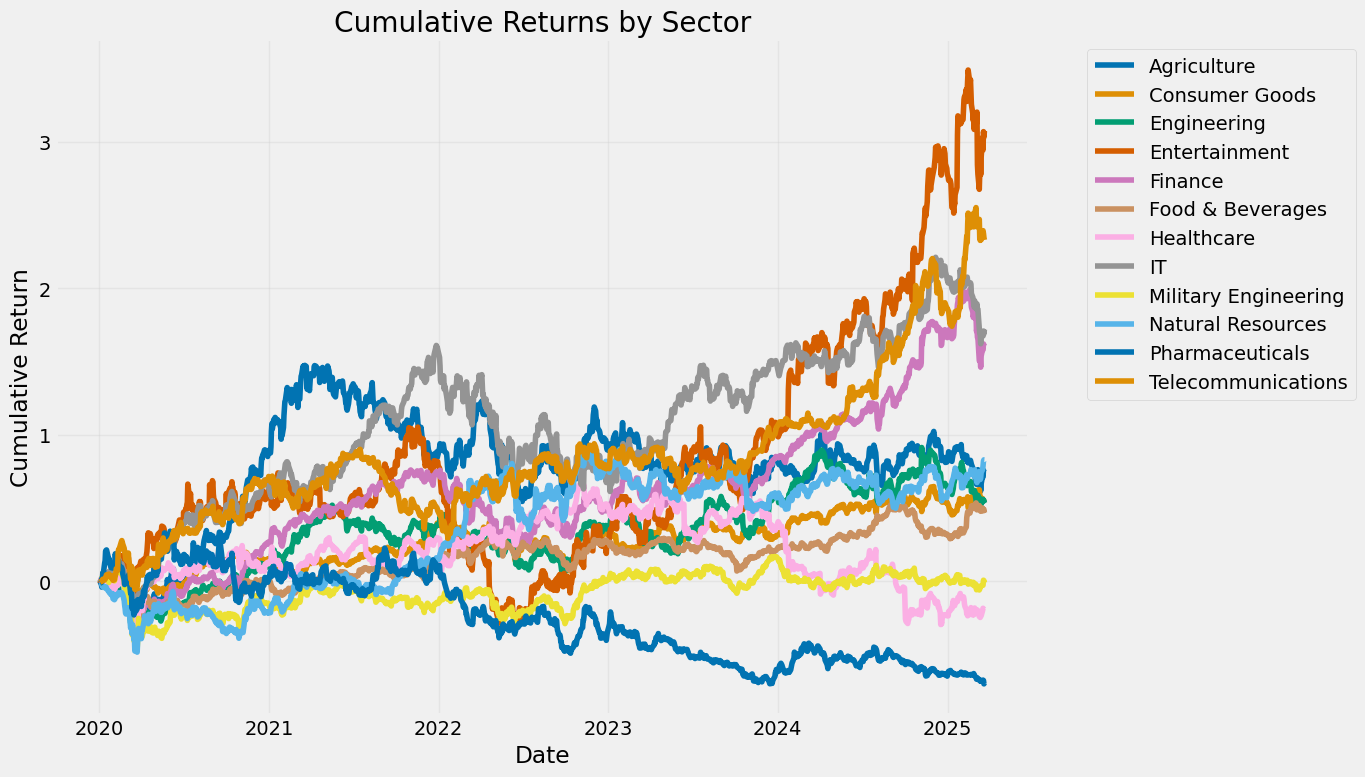

In [28]:
# Plot cumulative returns by sector
plt.figure(figsize=(14, 8))

for sector in sector_df['Sector'].unique():
    sector_data = sector_df[sector_df['Sector'] == sector].sort_values('Date')
    plt.plot(sector_data['Date'], sector_data['Cumulative_Returns'], label=sector)

plt.title('Cumulative Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
# Calculate sector performance metrics
sector_performance = sector_df.groupby('Sector').agg({
    'Returns': ['mean', 'std', 'count'],
    'Cumulative_Returns': 'last'
}).reset_index()

In [30]:
sector_performance.columns = ['Sector', 'Mean_Return', 'Volatility', 'Data_Points', 'Total_Return']
sector_performance['Annualized_Return'] = sector_performance['Mean_Return'] * 252
sector_performance['Annualized_Volatility'] = sector_performance['Volatility'] * np.sqrt(252)
sector_performance['Sharpe_Ratio'] = sector_performance['Annualized_Return'] / sector_performance['Annualized_Volatility']



In [31]:
# Sort by Sharpe ratio
sector_performance = sector_performance.sort_values('Sharpe_Ratio', ascending=False)



In [32]:
sector_performance


,Sector,Mean_Return,Volatility,Data_Points,Total_Return,Annualized_Return,Annualized_Volatility,Sharpe_Ratio
11,Telecommunications,0.0011,0.0173,1311,2.3289,0.2688,0.2746,0.9791
3,Entertainment,0.0014,0.0265,1311,3.0712,0.3583,0.4214,0.8504
4,Finance,0.0009,0.0162,1311,1.6040,0.2172,0.2572,0.8443
7,IT,0.0009,0.0180,1311,1.7183,0.2331,0.2855,0.8165
9,Natural Resources,0.0007,0.0209,1311,0.8289,0.1713,0.3315,0.5165
0,Agriculture,0.0006,0.0188,1311,0.7490,0.1521,0.2981,0.5101
1,Consumer Goods,0.0004,0.0132,1311,0.5374,0.1046,0.2092,0.4998
5,Food & Beverages,0.0004,0.0131,1311,0.4689,0.0957,0.2080,0.4599
2,Engineering,0.0005,0.0173,1311,0.5359,0.1202,0.2745,0.4379
8,Military Engineering,0.0002,0.0194,1311,-0.0087,0.0459,0.3083,0.1488


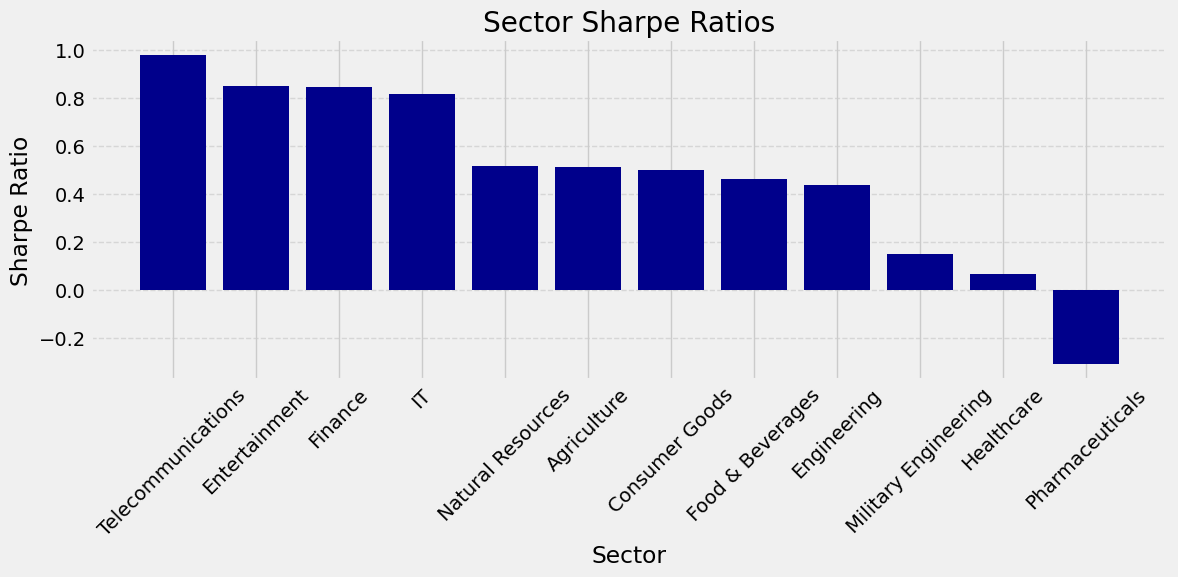

In [33]:
# Plot sector sharpe ratios
plt.figure(figsize=(12, 6))
plt.bar(sector_performance['Sector'], sector_performance['Sharpe_Ratio'], color='darkblue')
plt.title('Sector Sharpe Ratios')
plt.xlabel('Sector')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

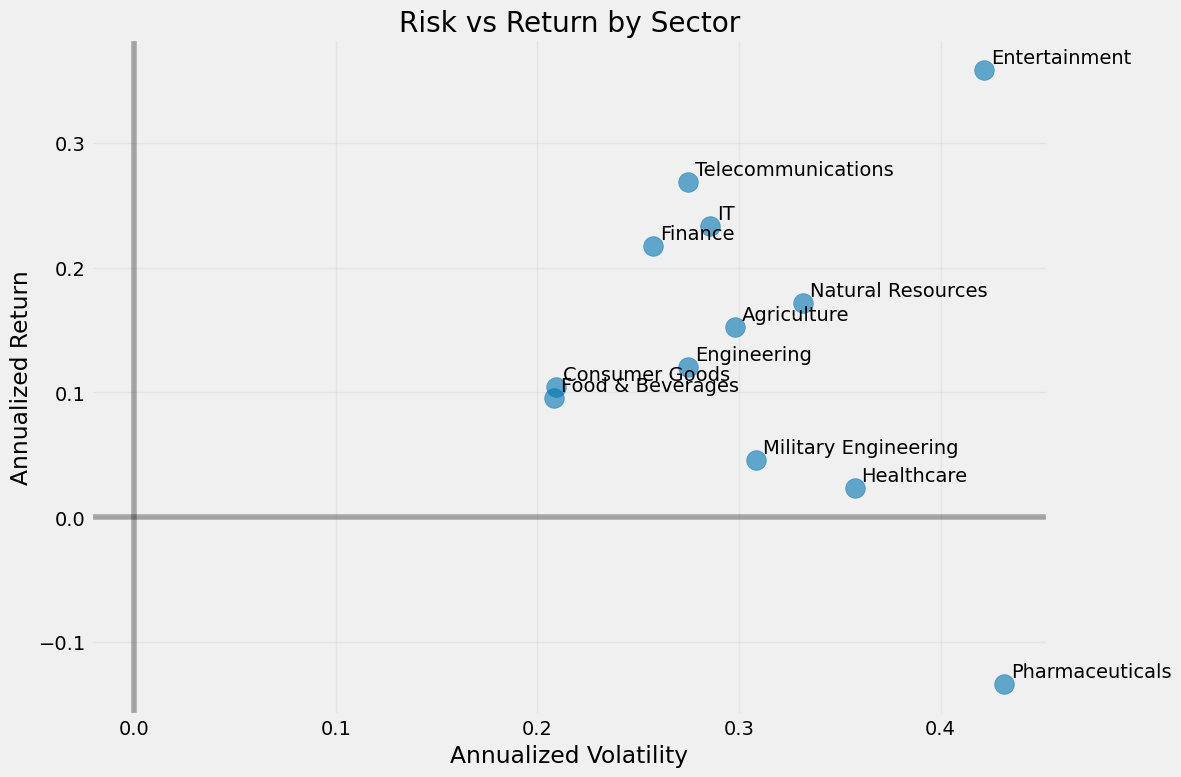

In [34]:
# Plot sector risk vs return
plt.figure(figsize=(12, 8))
plt.scatter(sector_performance['Annualized_Volatility'], 
            sector_performance['Annualized_Return'], 
            s=200, 
            alpha=0.6)

# Add labels for each point
for i, row in sector_performance.iterrows():
    plt.annotate(row['Sector'], 
                 (row['Annualized_Volatility'], row['Annualized_Return']),
                 xytext=(5, 5), 
                 textcoords='offset points')

plt.title('Risk vs Return by Sector')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Sector Rotation Analysis

In [35]:
# Calculate 3-month rolling returns by sector
rolling_returns = sector_df.copy()
rolling_returns['Rolling_3M_Return'] = rolling_returns.groupby('Sector')['Returns'].transform(
    lambda x: x.rolling(window=63).mean()  # ~63 trading days in 3 months
)

In [36]:
# Pivot the data to create a matrix of dates vs sectors
rolling_returns_pivot = rolling_returns.pivot_table(
    index='Date', 
    columns='Sector', 
    values='Rolling_3M_Return'
)

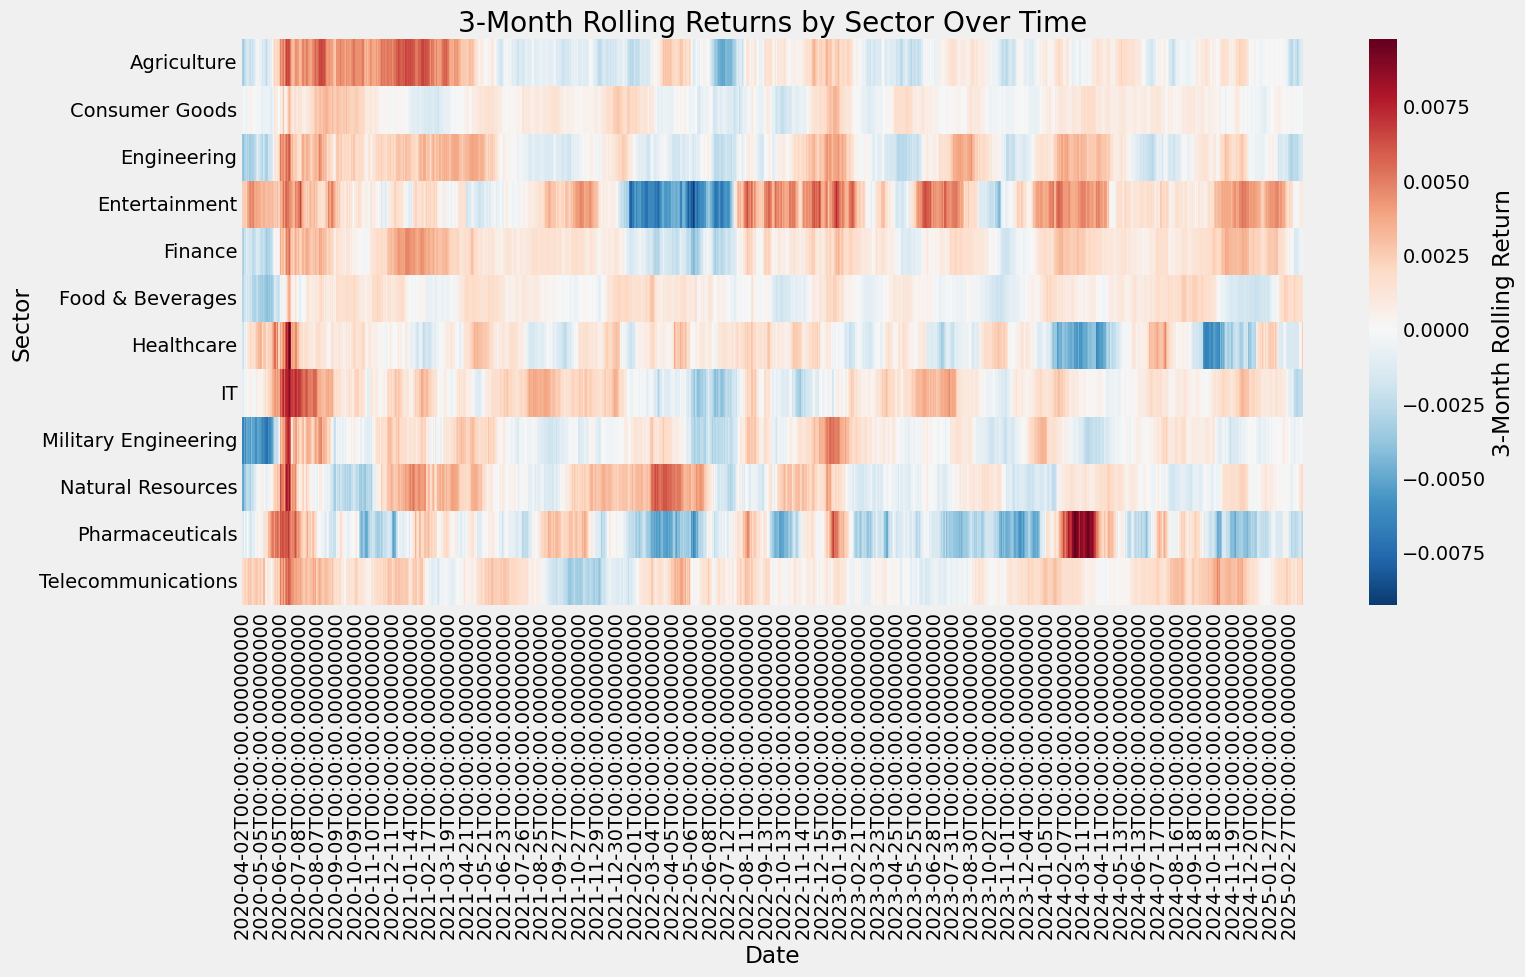

In [37]:
# Plot heatmap of rolling returns
plt.figure(figsize=(16, 10))
sns.heatmap(rolling_returns_pivot.T, cmap='RdBu_r', center=0, cbar_kws={'label': '3-Month Rolling Return'})
plt.title('3-Month Rolling Returns by Sector Over Time')
plt.xlabel('Date')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

In [38]:
# Calculate correlation between sector returns
sector_corr = rolling_returns_pivot.corr()

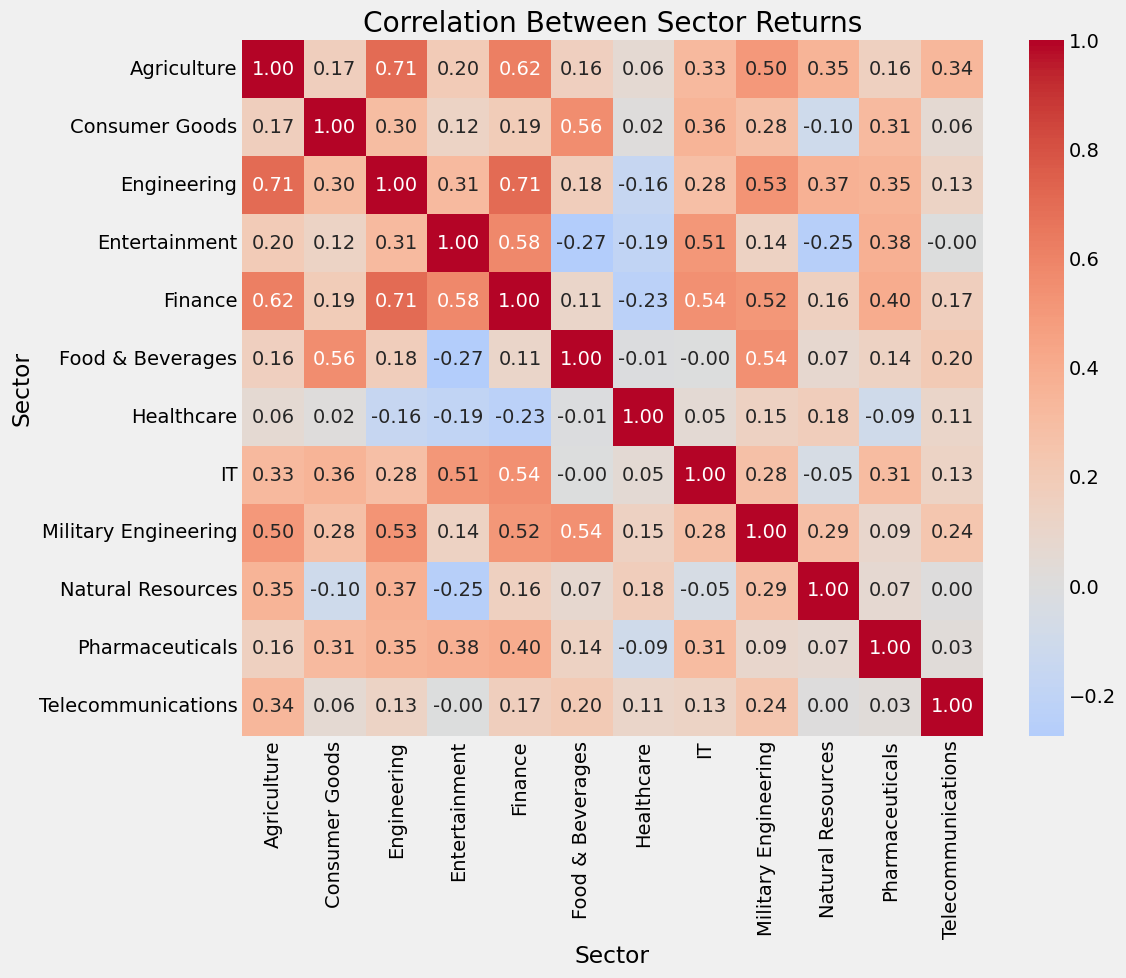

In [39]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Between Sector Returns')
plt.tight_layout()
plt.show()

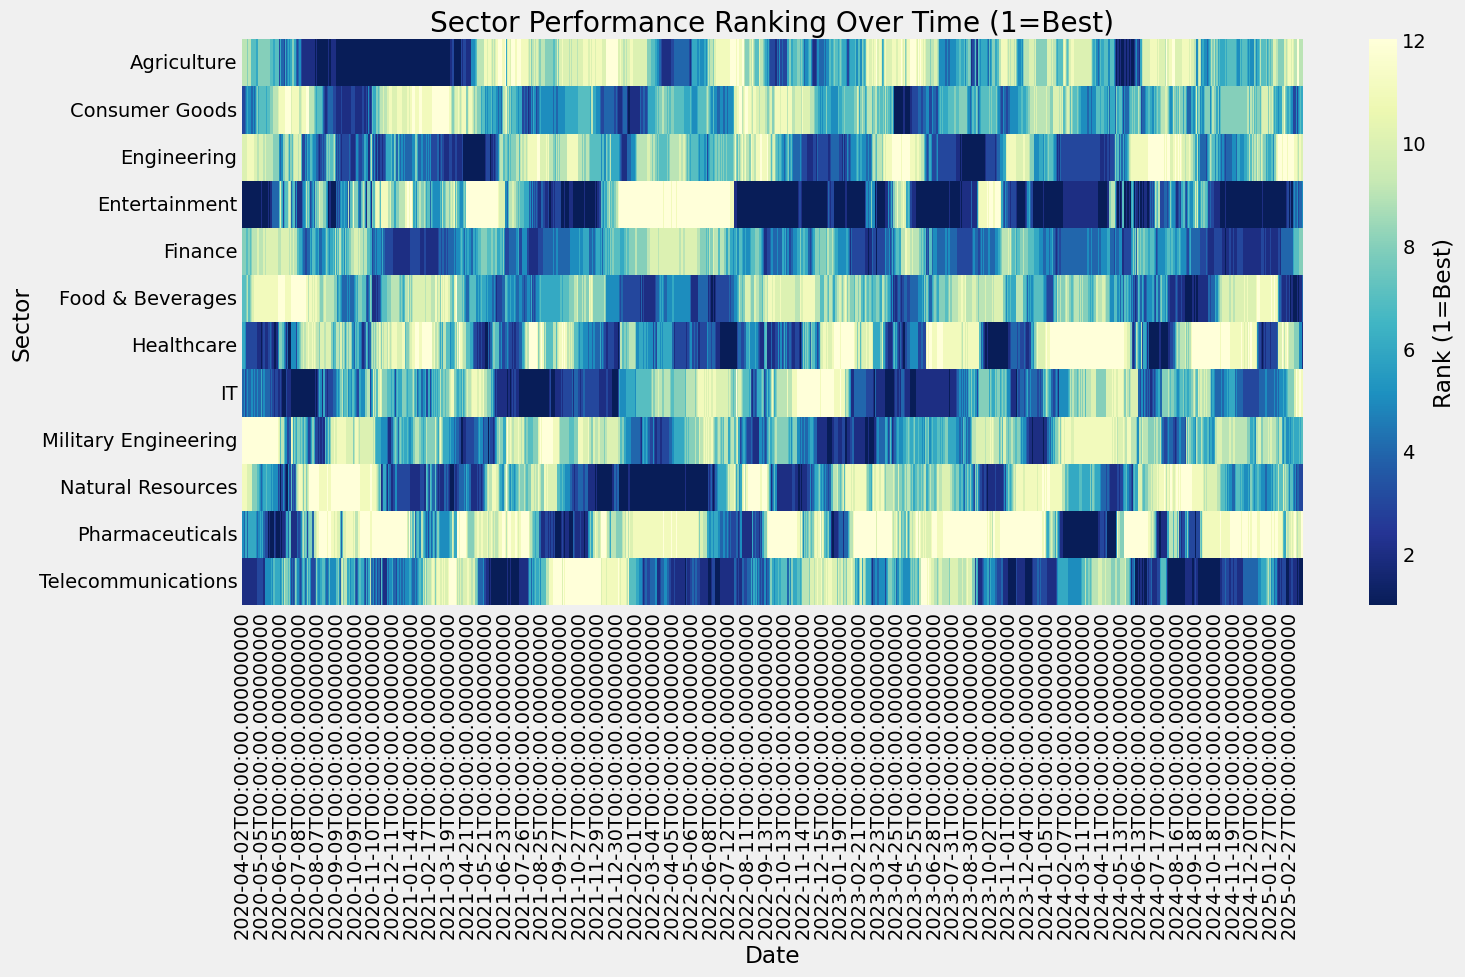

In [40]:
# Calculate sector rankings over time based on 3-month rolling returns
sector_ranks = rolling_returns_pivot.rank(axis=1, ascending=False)
# Plot sector rankings over time
plt.figure(figsize=(16, 10))
sns.heatmap(sector_ranks.T, cmap='YlGnBu_r', cbar_kws={'label': 'Rank (1=Best)'})
plt.title('Sector Performance Ranking Over Time (1=Best)')
plt.xlabel('Date')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

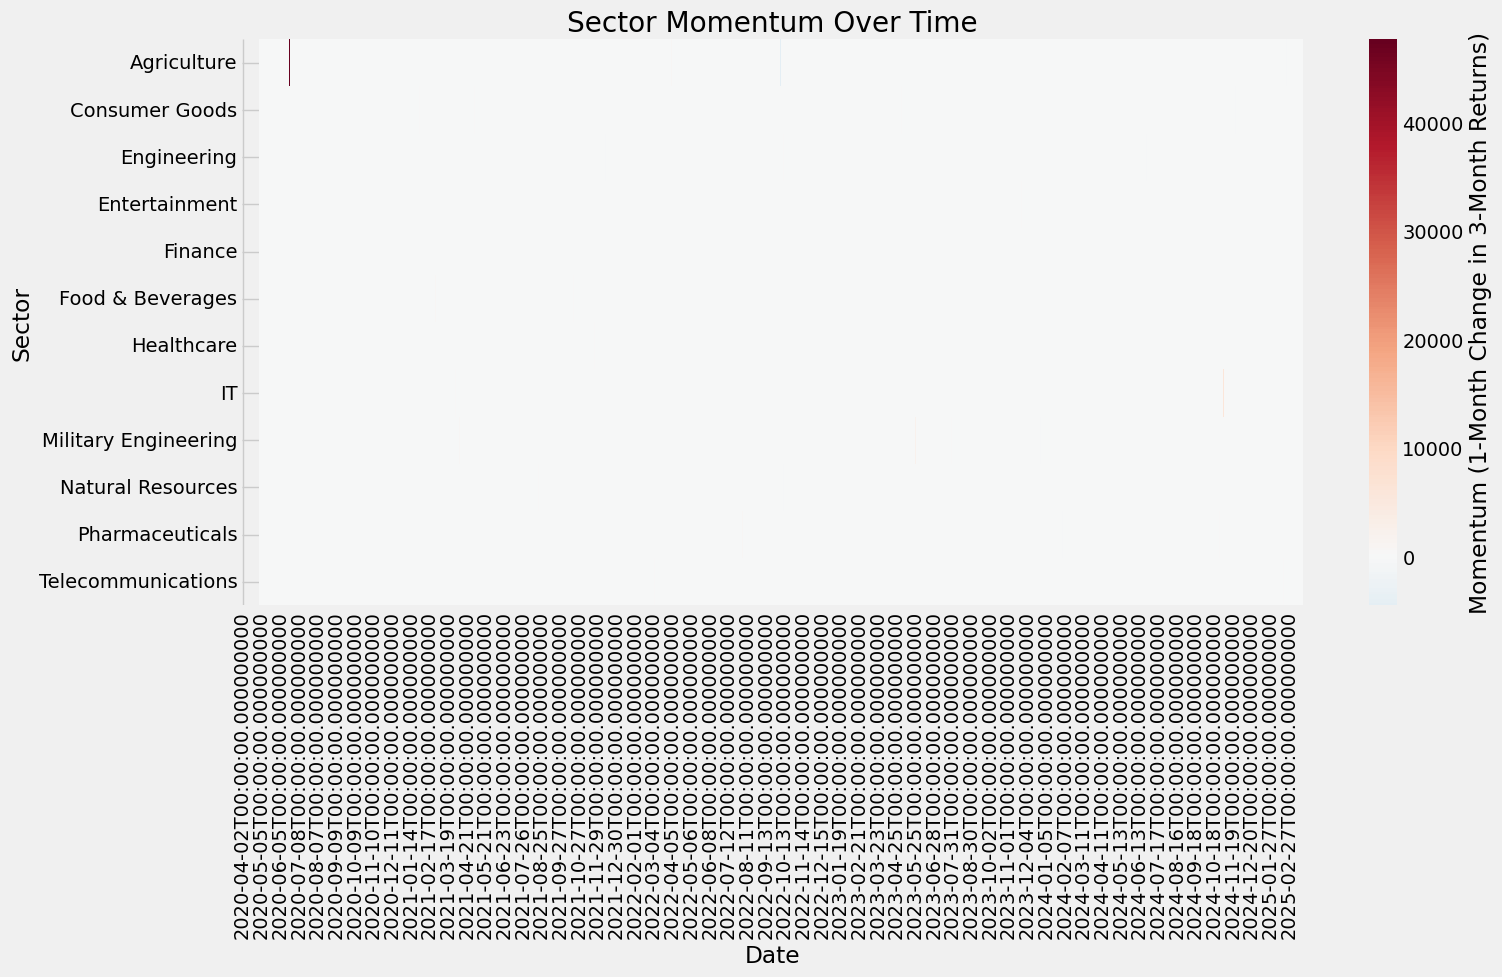

In [41]:
# Calculate sector momentum (rate of change in 3-month returns)
sector_momentum = rolling_returns_pivot.pct_change(periods=20)  # ~1 month momentum
# Plot sector momentum
plt.figure(figsize=(16, 10))
sns.heatmap(sector_momentum.T, cmap='RdBu_r', center=0, cbar_kws={'label': 'Momentum (1-Month Change in 3-Month Returns)'})
plt.title('Sector Momentum Over Time')
plt.xlabel('Date')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

 ## Performance of Top-Ranked Sectors

 analyze how well the top-ranked sectors perform in subsequent periods, which is the basis for our sector rotation strategy.



In [42]:
# Get the top-ranked sector for each date
top_sectors = sector_ranks.idxmin(axis=1).to_frame('Top_Sector')

In [43]:
# Join with next period's returns
next_period_returns = rolling_returns_pivot.shift(-20)  # Next month's return
top_sector_returns = pd.DataFrame()

In [44]:
for date in top_sectors.index:
    if date in next_period_returns.index:
        top_sector = top_sectors.loc[date, 'Top_Sector']
        if not pd.isna(top_sector) and top_sector in next_period_returns.columns:
            top_sector_returns.loc[date, 'Next_Period_Return'] = next_period_returns.loc[date, top_sector]


In [45]:
# Calculate average next-period return for top-ranked sectors
top_sector_avg_return = top_sector_returns['Next_Period_Return'].mean()
print(f"Average next-period return of top-ranked sectors: {top_sector_avg_return:.4%}")


Average next-period return of top-ranked sectors: 0.2946%


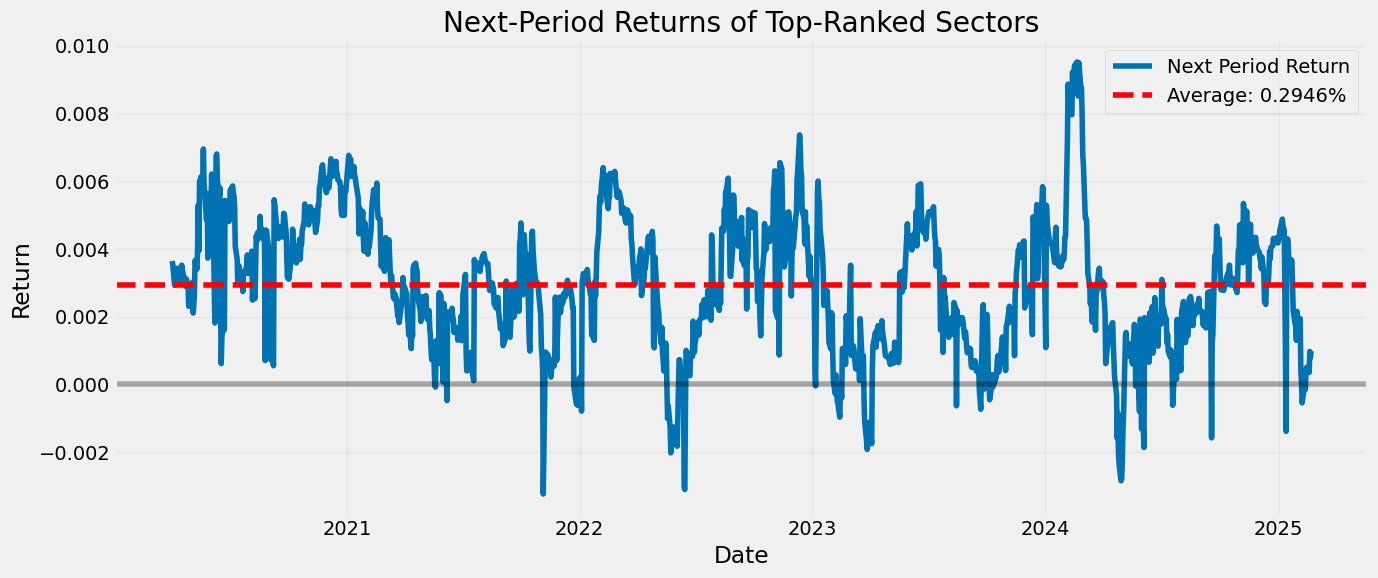

In [46]:
# Plot next-period returns of top-ranked sectors
plt.figure(figsize=(14, 6))
plt.plot(top_sector_returns.index, top_sector_returns['Next_Period_Return'], label='Next Period Return')
plt.axhline(y=top_sector_avg_return, color='r', linestyle='--', label=f'Average: {top_sector_avg_return:.4%}')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Next-Period Returns of Top-Ranked Sectors')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()